In [16]:
# Importing files
from pandas_datareader import data # to get data from online yahoo finance
import matplotlib.pyplot as plt # for plotting 
import pandas as pd # for datasets and data management 
import numpy as np # for calculations 
from sklearn import linear_model # for regression models
from sklearn.metrics import mean_squared_error # for error analysis 
from math import sqrt # for simple math calc

In [17]:
def getDataYahoo(symbols,start_date,end_date,paraCol):
    data_source="yahoo"
    panel_data = data.DataReader(symbols, data_source, start_date, end_date)
    df_tmp = panel_data[str(paraCol)]
    all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')
    df_tmp = df_tmp.reindex(all_weekdays)
    df_clean = dataCleaning(df_tmp)
    return df_clean

def dataCleaning(df):
    df_tmp = df.fillna(method="ffill")
    df_clean = df_tmp.fillna(method="bfill")
    return df_clean

def plotData(df,title="",x="",y=""):
    ax = df.plot(title=title)
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    plt.show()

In [18]:
class LinRegMachineLearner:
    def __init__(self):
        pass
    
    def train(self,x , y):
        regr = linear_model.LinearRegression()
        regr.fit(x[:, np.newaxis], y[:, np.newaxis])
        self.coef = regr.coef_
        self.int = regr.intercept_
        print "Training done."
    
    def predict(self,x):
        print "Prediction done."
        regr = linear_model.LinearRegression()
        regr.coef_ = self.coef
        regr.intercept_ = self.int
        result = regr.predict(x[:, np.newaxis])
        result = np.squeeze(result)
        return result

In [7]:
# Training Dataset Gathering
googleDF = getDataYahoo("GOOG",'2017-01-01','2017-01-31',"Adj Close")
google = googleDF.as_matrix()
spyDF = getDataYahoo("SPY",'2017-01-01','2017-01-31',"Adj Close")
spy = spyDF.as_matrix()

# Corrected Dataset Gathering
newSpyDF = getDataYahoo("SPY",'2017-01-15','2017-01-31',"Adj Close")
newSpy = newSpyDF.as_matrix()
correctGoogleDataDF = getDataYahoo("GOOG",'2017-01-15','2017-01-31',"Adj Close")
correctGoogleData = correctGoogleDataDF.as_matrix()

In [20]:
# Supervised Linear Regression Machine Learning
myMachine = LinRegMachineLearner()
myMachine.train(spy,google)
predictedData = myMachine.predict(newSpy)

Training done.
Prediction done.


Linear Regression Algorithm
--------------------------------------------
Model Training - 1M 
Model Prediction - 1W


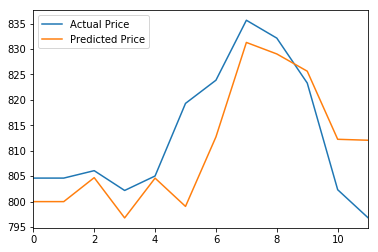

In [21]:
print "Linear Regression Algorithm"
print "--------------------------------------------"
print "Model Training - 1M \nModel Prediction - 1W"
plotData(pd.DataFrame({'Actual Price':correctGoogleData, 'Predicted Price':predictedData}))

In [24]:
print sqrt(mean_squared_error(correctGoogleData,predictedData))

9.01510194404
